<a href="https://colab.research.google.com/github/jiyanshud22/CS786A2/blob/main/CS786A2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CS786** Assignment

Jiyanshu Dhaka 220481

# Q1. (40 points)
Without using any third-party libraries or toolboxes, write code to

### (a) take any three variable Boolean function as input


let the 3 variables are x,y,and z.

function can be written using Boolean operators NOT('),AND(.),and OR(+).

In [1]:
import numpy as np
from numpy.random import rand as U

In [ ]:
def bool_function_input():
    f = input("Enter your Boolean function (use x, y, z): ")
    bool_exp = ""

    # Converting the Boolean function into an evaluable Python expression
    for j in range(len(f)):
        if f[j] == "'":
            bool_exp = bool_exp[:-1] + "(1 - " + str(bool_exp[-1]) + ")"
        elif f[j] == ".":
            bool_exp += "*"
        elif f[j] == "+":
            bool_exp += "+"
        else:
            bool_exp += f[j]

    return bool_exp


### (b) generate training examples for this Boolean function


### (c) train a neural network to learn this Boolean function, and


Sigmoid Activation function is


 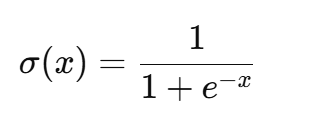   


 activation function helps in binary classification.
It converts network's output into a value between 0 and 1.

Forward Propagation


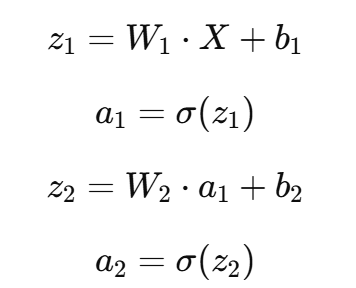

Backpropagation:

error between predicted and actual output is calculated using the MSE (mean squared error):

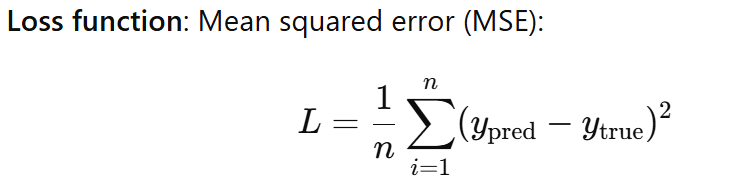


And derivative of sigmoid func.

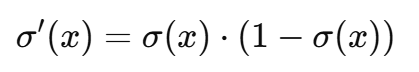



I calculated gradients using chain rule to update the weights

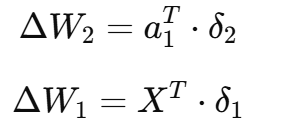



In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def train_neural_network(X, Y, epochs=10000, lr=0.1):
    np.random.seed(1)

    # Initialize weights and biases
    W1 = np.random.randn(3, 4)  # 3 inputs, 4 neurons in hidden layer
    W2 = np.random.randn(4, 1)  # 4 neurons in hidden layer, 1 output neuron
    b1 = np.random.randn(4)
    b2 = np.random.randn(1)

    for epoch in range(epochs):
        # Forward pass
        z1 = np.dot(X, W1) + b1
        a1 = sigmoid(z1)
        z2 = np.dot(a1, W2) + b2
        a2 = sigmoid(z2)

        # Backpropagation
        error = Y - a2
        dz2 = error * sigmoid_derivative(a2)
        dW2 = np.dot(a1.T, dz2)
        db2 = np.sum(dz2, axis=0)

        dz1 = np.dot(dz2, W2.T) * sigmoid_derivative(a1)
        dW1 = np.dot(X.T, dz1)
        db1 = np.sum(dz1, axis=0)

        # Update weights and biases
        W1 += lr * dW1
        W2 += lr * dW2
        b1 += lr * db1
        b2 += lr * db2

    return W1, W2, b1, b2


In [ ]:
def my_neural(X, Y):
    w1 = np.random.rand(3, 10)  # 10 hidden neurons
    w2 = np.random.rand(10, 1)
    # Rest of training logic follows...


### (d) verify that the function has been learned, for five separate Boolean functions

examples of boolean functions:

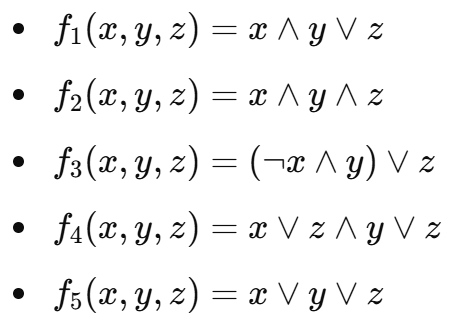